In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Customer Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded.
#converting total charges data type to float.

In [3]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#converted the 0 and 1 values of SeniorCitizen to yes/no to make it easier to understand.

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


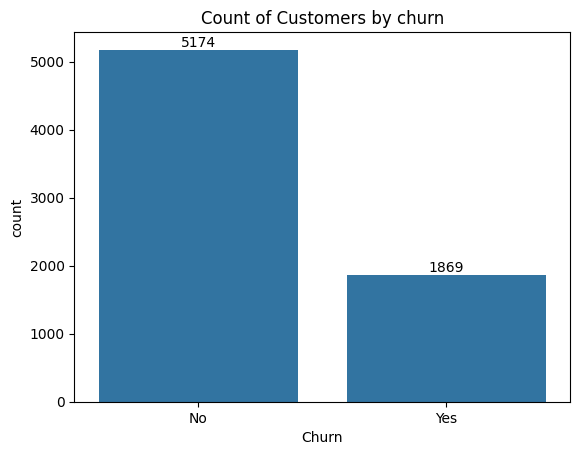

In [11]:
ax=sns.countplot(x="Churn",data=df)


ax.bar_label(ax.containers[0])
plt.title("Count of Customers by churn")
plt.show()



In [12]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb


,Churn
Churn,
No,5174
Yes,1869


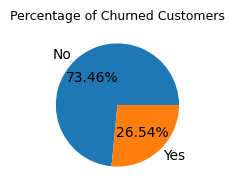

In [13]:
plt.figure(figsize = (2,2))
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=9)
plt.show()

#FROM THE GIVEN PIE CHART WE CAN CONCLUDE THAT 26.54% OF OUR CUSTOMERS HAS CHURNED OUT
#NOW LETS EXPLORE THE REASON BEHIND IT

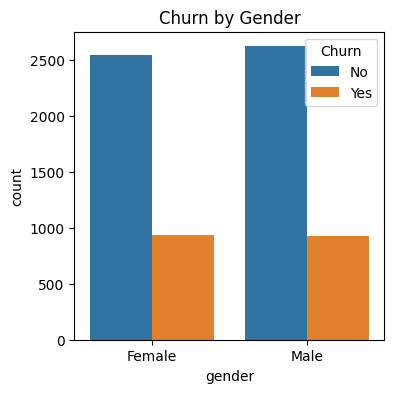

In [14]:
plt.figure(figsize = (4,4))
sns.countplot(x="gender",data= df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

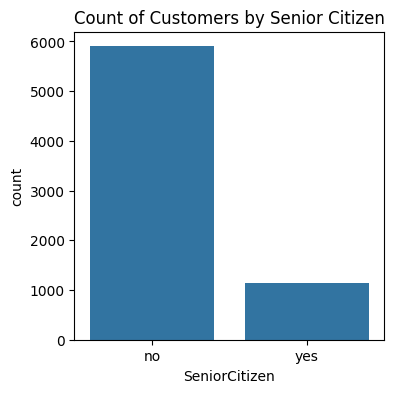

In [23]:
plt.figure(figsize= (4,4))
sns.countplot(x="SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

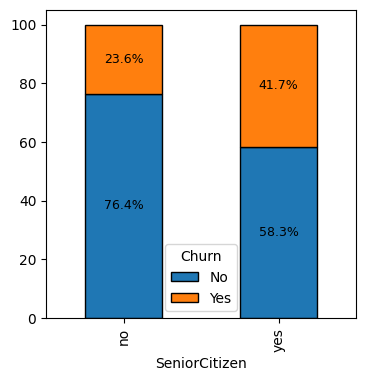

In [18]:
ax = ct_perc.plot(kind="bar", stacked=True, figsize=(4,4), edgecolor="black")

for i, (_, row) in enumerate(ct_perc.iterrows()):  # enumerate gives numeric x=0,1,...
    cum = 0
    for v in row:
        if v > 0:
            ax.text(i, cum + v/2, f"{v:.1f}%", ha="center", va="center", fontsize=9)
        cum += v


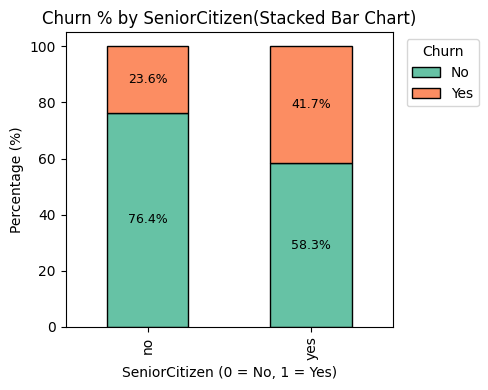

In [17]:
# 1. Make crosstab of counts
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# 2. Convert counts to row percentages
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar
ax = ct_perc.plot(kind="bar", stacked=True, figsize=(5,4),
                  color=sns.color_palette("Set2"), edgecolor="black")

# 4. Add % labels
for i, row in enumerate(ct_perc.itertuples(index=False)):
    cum = 0
    for val in row:
        if val > 0:
            ax.text(i, cum + val/2, f"{val:.1f}%", 
                    ha="center", va="center", fontsize=9, color="black")
        cum += val

# 5. Styling
plt.title("Churn % by SeniorCitizen(Stacked Bar Chart)")
plt.ylabel("Percentage (%)")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.legend(title="Churn", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


#Comparitively a greater percentage of people in senior citizen category have churned

In [ ]:
plt.figure(figsize = (11,4))
sns.histplot(x="tenure",data = df,bins = 72,hue="Churn")


#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 month have churned.

In [ ]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x="Contract",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are likely to churn from those who have 1 or 2 years of contract.

In [ ]:
df.columns.values

In [ ]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up subplot grid (3x3 for 9 features)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # turn into 1D array for easy iteration

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn")
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=0)  # rotate labels if needed

plt.tight_layout()
plt.show()


#Customers with fiber optic internet, no online security, no tech support, and no online backup exhibit significantly higher churn rates. In contrast, core services like phone service, streaming TV, and streaming movies show relatively less influence on churn behavior. Overall, the absence of supportive and protective services emerges as a key driver of customer attrition.

In [ ]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x="PaymentMethod",data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customers by Payment Method",fontsize = 15)
plt.show()

In [ ]:
#customer is likely to churn when he is using electronic check as a payment method.